# Multinomial logistic regression 

The MLR function is a statistical classification algorithm. MLR is similar to the BLR model you worked on earlier, but MLR can predict the probabilities of different possible outcomes of a categorical dependent variable conditional on a set of independent variables. The independent variable can be real-valued, categorical-valued, or binary-valued. For example, while BLR can predict binary outcomes (e.g. yes or no, 1 or 0), the MLR can predict one out of  possible outcomes, where  can be any integer greater than 1.

Because the MLR function is a statistical classification algorithm, if you feed the function a set of values, the model performs a series of mathematical operations to normalise the input values into a vector of values that follows a probability distribution. The input that we give to the model is a feature vector, , containing features , while the output is a probability vector, , containing probabilities  for the  target classes. Therefore, , since the total probability of all the possible events in a system is always 1.

MLR explains the relationship between one nominal dependent variable and one or more independent variables. For example, if a movie studio wants to predict what type of film a moviegoer is more likely to see, MLR can determine the strength of influence a person’s age, gender, and dating status might have on the probability of choosing a specific movie. The output can then be used in a marketing campaign.

MLR is used to predict categorical placement in, or the probability of category membership on, a dependent variable based on multiple independent variables. The independent variables can be either dichotomous (i.e. binary) or continuous (i.e. interval or ratio in scale).

Let’s investigate an MLR more with a business case scenario.

## Demonstration: Building an SVM (oyster research) 

Oysters, according to international laws, need to be of a certain size to be considered for export, import, and wholesale. An oyster research station currently has a population of 9,484 oysters consisting of females, males, and ‘spats’ (infant oysters). They determine the size of the oyster with laser technology when they scan the tanks twice a day. Based on the scans, the oysters are divided into female, male, or infant classes. Note that female oysters are worth more in a breeding environment as they are scarcer.

#### Scenario

Here’s the challenge to the business. As the population size is big, it’s difficult to manually determine the sex and size of the oysters. Oysters are born as male, but, with age or by growing larger, they can switch sexes; they can even have both sex organs at the same time. The research station, therefore, is interested to determine whether predictive analysis can assist them in accurately determining the sex of mature oysters based on size measurements. 

Do you think you would be able to assist them and fit an MLR model? Would it be possible to use the size of the oysters to determine the sex? If so, how accurate will the model be?

The oyster research station has provided you with the following files (which you’ll find in the Data sets folder of the ZIP file you downloaded from 2.0 Focus of the week): oysters.csv, metadata_oysters.txt. Follow along with the prompts to build a multinomial MLR model and help solve the research station’s challenge. Most of the prompts are similar to BLR you worked through earlier. Therefore, only new prompts will be explained. 



# 1. Import and read the data set

In [1]:
# [2] Import all the necessary packages: Pandas, NumPy, SciPy, Sklearn, StatsModels:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix


# [3] Upload the CSV file.
oysters = pd.read_csv('oysters.csv')  

# [4] Print the columns.
oysters.columns 

Index(['sex', 'length', 'diameter', 'height', 'total_weight', 'raw_weight',
       'intestines_weight', 'shell_weight', 'age'],
      dtype='object')

In [2]:
# View the DataFrame
oysters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB


<img width="601" alt="Screenshot 2022-05-20 at 15 36 48" src="https://user-images.githubusercontent.com/98043245/169551198-c88f5520-084a-4d3f-9a26-b0624403b2f5.png">


In [3]:
# [1] Apply the value_counts() method, and 
# [2] Assign the results to a new DataFrame:
oysters_sex=oysters['sex'].value_counts()

# [3] Print the contents.
print(oysters_sex)  

male      3561
female    3113
infant    2810
Name: sex, dtype: int64


The output shows that our data set comprises 3,561 males, 3,113 females, and 2,810 infants – success! 

Let’s go over what you’ve done up to this point. You have read the raw data into a DataFrame and used methods to inspect the data. Unlike in the previous BLR example you worked through, the categories have relatively similar counts, so the data is balanced; you won’t need to take extra steps to balance the data in this instance. The next steps will be to separate the dependent variable from the independent variables, build the model, create the equation, and test the model’s accuracy. 

Let’s continue.

# 2. Identifying the dependent variable column

<img width="600" alt="Screenshot 2022-05-20 at 15 38 20" src="https://user-images.githubusercontent.com/98043245/169551499-cb041fda-cca5-435b-9d1b-00a180f2202a.png">


In [4]:
# [1] Set the independent and dependent variables:
# [1a] Set the independent variable.  
X = oysters.drop(['sex'], axis=1) 
# [1b] Set the dependent variable. 
y = oysters['sex']   

# [2] Print to check ‘sex’ column was dropped.
print(list(X.columns.values))  

# [3] Specify the train and test data sets and 
# [3a] Use 30% as the ‘test_size’ and a random_state of one:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30, random_state = 1, stratify=y) 

# [4] Print the shape of all the train and tests sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']
(6638, 8)
(2846, 8)
(6638,)
(2846,)


# 3. Build the model

<img width="606" alt="Screenshot 2022-05-20 at 15 39 28" src="https://user-images.githubusercontent.com/98043245/169551724-a06b9cfb-4980-43af-bf50-7b4414bb4ec3.png">

In [5]:
# [1] Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# [2] Create a function and [2a] set values.
scaler = MinMaxScaler(feature_range = (0,1))  

# [3] Add the X_train data set to the ‘scaler’ function:
scaler.fit(X_train)
# [3a] Specify X_train data set.
X_train = scaler.transform(X_train) 
# [3b] Specify X_test data set. 
X_test = scaler.transform(X_test)  

<img width="575" alt="Screenshot 2022-05-20 at 15 40 06" src="https://user-images.githubusercontent.com/98043245/169551852-bbf702d5-eb2c-4a58-a7ee-2f50a4a816ef.png">

In [6]:
# [1] Define the MLR model and [1a] set predictions and parameters:
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, y_train)
# [2] Set the predictions equal to the ‘MLR’ function and 
# [2a] specify the DataFrame.
preds = MLR.predict(X_test) 

# [3] Set the parameters equal to the DataFrame and 
# [3a] add the ‘get_params’ function. 
params = MLR.get_params() 

# [4] Print the parameters.
print(params)  

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Next, we need to evaluate the MLR intercept and coefficients as follows:

In [7]:
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)

Intercept: 
 [-1.84884206  1.60342411  0.24541795]
Coefficients: 
 [[ -5.81733909   5.7800541    5.43352513   5.13188689  -5.01932184
    4.32806842  -1.07709351   1.35837573]
 [ 10.24642486  -6.10000414  -7.87967805 -11.48771326   6.38638045
   -6.62217349   1.90520149  -3.11255116]
 [ -4.42908577   0.31995003   2.44615292   6.35582636  -1.36705861
    2.29410506  -0.82810798   1.75417544]]


Nicely done! The first array contains three intercepts, while the second array contains three sets of regression coefficients. These elements allow you to construct regression equations for the model and assess the model variables. 

# 4. Create a linear equation from the logit model

In this example, we will use a different method to create a linear equation. 

You’ll use the MNLogit(statsmodels) function, which is similar to the logistic regression (sklearn.linear_model) we employed earlier. However, it’s from another package. Python has different functions that can be employed to get similar results. It’s important to take note of these similarities as some team members or stakeholders might use a different approach than you. 

<img width="590" alt="Screenshot 2022-05-20 at 15 44 31" src="https://user-images.githubusercontent.com/98043245/169553099-affd81fa-2f0b-457a-b2c9-0aa743eeb847.png">


In [8]:
# [1] Name the model and [2] Set model to the function:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model

# [3] Specify how the function returns the results.
result=logit_model.fit()  

# [4] Print the report as a ‘result.summary()’ function: 
print("Summary for Sex:I/M :\n ", result.summary())

Optimization terminated successfully.
         Current function value: 0.854457
         Iterations 8
Summary for Sex:I/M :
                            MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 6638
Model:                        MNLogit   Df Residuals:                     6620
Method:                           MLE   Df Model:                           16
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.2189
Time:                        09:11:45   Log-Likelihood:                -5671.9
converged:                       True   LL-Null:                       -7261.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
sex=infant       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4522      0.316     10.913      0.000       2.832       4.072
x1   

# 5. Check the accuracy of the model

As with the BLR, we need to create a confusion matrix, which reveals key classification metrics, specifically precision, which measures how effective our model is at making positive predictions. 



In [11]:
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

Accuracy score: 0.5309205903021785
              precision    recall  f1-score   support

      female       0.47      0.34      0.39       934
      infant       0.63      0.80      0.70       843
        male       0.48      0.49      0.48      1069

    accuracy                           0.53      2846
   macro avg       0.52      0.54      0.53      2846
weighted avg       0.52      0.53      0.52      2846



The accuracy of the model is 53%, which is not very accurate and therefore not useful as a predictive model. It seems that there is a 47% chance of success to indicate females by employing size as a variable. Therefore, as breeding programmes are very expensive and time-consuming, it might not be the best way to proceed. While inaccuracy seems to be a negative indicator, in fact, we have saved the oyster breeders a lot of wasted time and money. (Imagine they used size to indicate sex, this would be catastrophic as predictions would only be correct about half the time!)

# 6. Visualise the MLR model

<img width="598" alt="Screenshot 2022-05-20 at 15 48 00" src="https://user-images.githubusercontent.com/98043245/169553814-75823332-ca51-47d7-baa0-550ac852f815.png">

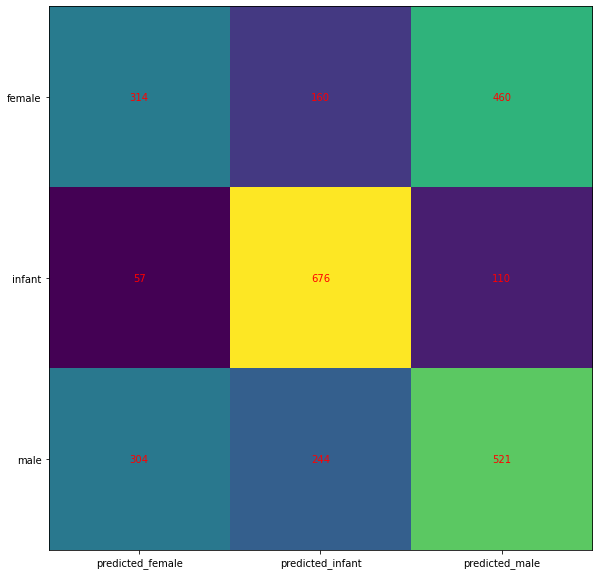

In [10]:
# [1] Import matplotlib to create a visualisation.
import matplotlib.pyplot as plt  

# [2] Define confusion matrix.
cm = confusion_matrix(y_test, preds)  

# [3] Create visualisation for the MLR:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('predicted_female',
                                          'predicted_infant',
                                          'predicted_male'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))

# ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

#### Notes:

The oyster research station needed to accurately determine the sex of mature oysters based on size measurements. Using multinomial logistic regression (MLR), we can now see from the output (which is essentially a confusion matrix) that our model correctly classified 314 females as females while it incorrectly classified 160 cases as infants and 460 cases as males. Similarly, 57 cases were incorrectly identified as infants while 676 cases were accurately classified as infants. But there were 110 cases that were incorrectly identified as males. Finally, there were 304 and 244 cases where the model incorrectly classified the males as females and infants respectively. But it also identified 521 accurate cases of male. 